# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
file_path = "FPI_KEY_2008_FORWARD.xlsx" 
df = pd.read_excel(file_path)
df.head(5)


,Unnamed: 0,00 Forbrugerprisindekset i alt,01 Fødevarer og ikke-alkoholiske drikkevarer,02. Alkoholiske drikkevarer og tobak,03. Beklædning og fodtøj,"04. Boligbenyttelse, elektricitet og opvarmning","05. Møbler, husholdningsudstyr og husholdningstjenester",06. Sundhed,07. Transport,08. Kommunikation,09. Fritid og kultur,10. Uddannelse,11. Restauranter og hoteller,12. Andre varer og tjenester,13.1 Varer i alt,13.2 Tjenester i alt,14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødevarer (Kerneinflation),15.1 Forbrugerprisindeks ekskl. energi
0,2008M01,88.2,89.5,76.5,84.5,84.0,93.5,88.7,95.0,119.4,98.8,76.7,84.0,82.5,92.9,83.8,87.9,88.1
1,2008M02,89.3,89.7,76.5,93.5,85.3,94.0,88.2,95.1,117.9,100.5,76.7,84.6,82.7,93.7,85.0,89.2,89.2
2,2008M03,89.7,90.0,77.7,98.1,85.5,94.3,88.4,95.5,117.8,99.3,76.7,84.9,83.3,94.6,85.0,89.5,89.6
3,2008M04,90.0,90.9,78.3,98.8,85.6,94.6,89.5,95.9,117.3,99.0,76.7,85.3,83.6,95.1,85.1,89.6,89.8
4,2008M05,90.3,91.6,78.3,98.8,85.6,95.1,88.9,97.2,117.1,98.8,76.7,86.0,83.8,95.5,85.2,89.8,90.1


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [7]:
# Assuming 'df' is your DataFrame and the first column contains date-like strings
# Extract the first 4 characters from each string in the first column to get the year
df['Year'] = df[df.columns[0]].apply(lambda x: x[:4])

# Now 'df' has an additional column named 'Year' that contains the year portion extracted from the first column


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [8]:
# Assuming 'df' is your DataFrame
column_names = df.columns.tolist()

# Print each column name on a new line
for column_name in column_names:
    print(column_name)

Unnamed: 0
00 Forbrugerprisindekset i alt
01 Fødevarer og ikke-alkoholiske drikkevarer
02. Alkoholiske drikkevarer og tobak
03. Beklædning og fodtøj
04. Boligbenyttelse, elektricitet og opvarmning
05. Møbler, husholdningsudstyr og husholdningstjenester
06. Sundhed
07. Transport
08. Kommunikation
09. Fritid og kultur
10. Uddannelse
11. Restauranter og hoteller
12. Andre varer og tjenester
13.1 Varer i alt
13.2 Tjenester i alt
14.1 Forbrugerprisindeks ekskl. energi og ikke-forarbejdede fødevarer (Kerneinflation)
15.1 Forbrugerprisindeks ekskl. energi
Year


Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

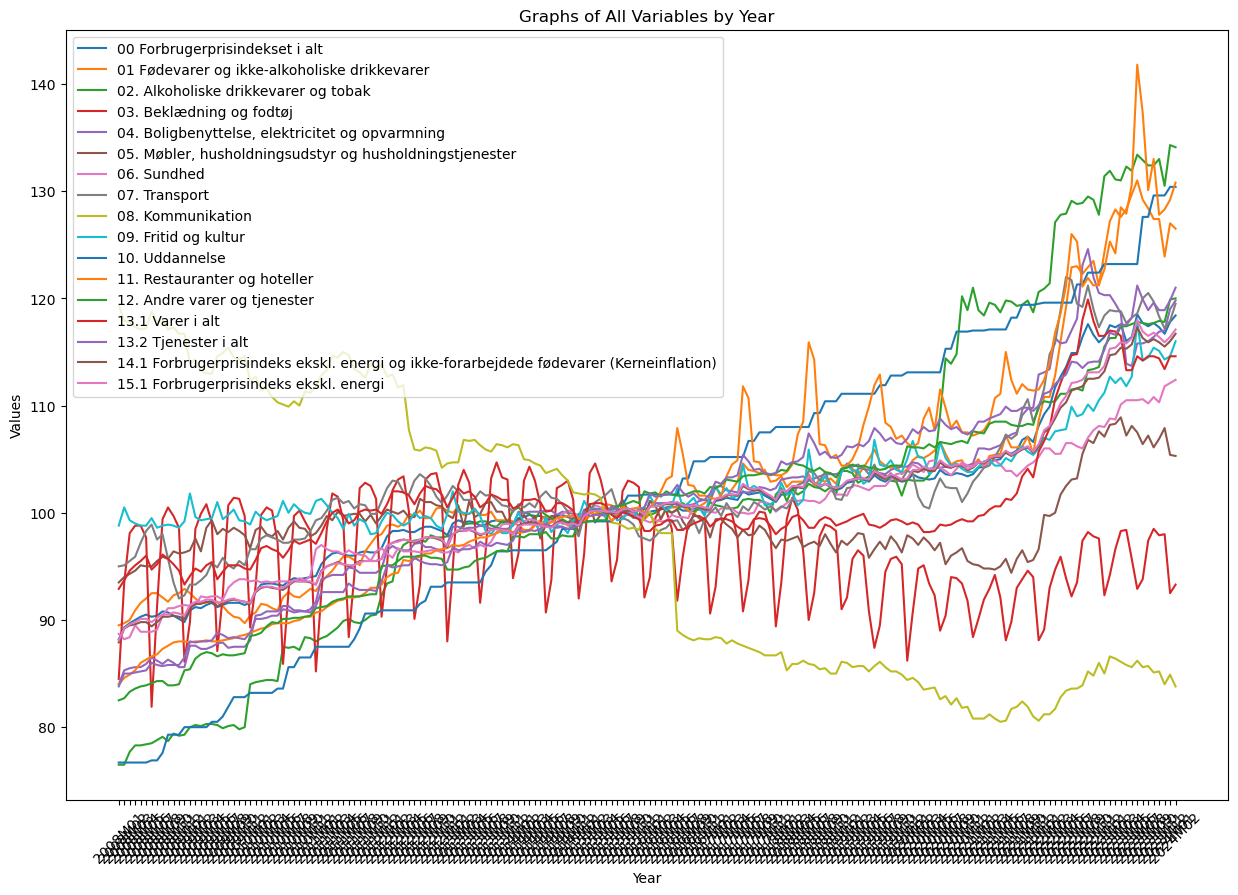

In [9]:
# Extract the year from the first column and create a new 'Year' column
df['Year'] = df[df.columns[0]].apply(lambda x: x[:12])

# Set the figure size for better readability
plt.figure(figsize=(15, 10))

# Plot each column against 'Year', skipping the first original column and the new 'Year' column itself
for column in df.columns[1:-1]:  # Skip the last column as it is the 'Year' column
    plt.plot(df['Year'], df[column], label=column)

# Add legend to the plot
plt.legend()

# Add titles and labels
plt.title('Graphs of All Variables by Year')
plt.xlabel('Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Values')

# Show the plot
plt.show()



In [10]:
def plot_variable(df, variable):
    # Ensure the year column is correctly recognized as datetime and set as the index
    df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
    df.set_index('Year', inplace=True)
    
    # Plotting the specified variable
    ax = df[[variable]].plot(style='-o', legend=False)
    ax.set_ylabel(variable)
    ax.set_title(f'Annual Data for {variable}')

# Example DataFrame 'df' creation - replace this with your actual DataFrame loading method
# df = pd.read_excel('your_file.xlsx')
# Assuming you have already added a 'Year' column as discussed previously

# Example usage with widgets.interact
variables = df.columns[1:-1]  # assuming the first column is the year and the last is 'Year' column added previously
widgets.interact(plot_variable, 
                 df=widgets.fixed(df),
                 variable=widgets.Dropdown(description='Variable', 
                                           options=variables, 
                                           value=variables[0]))

interactive(children=(Dropdown(description='Variable', options=('00 Forbrugerprisindekset i alt', '01 Fødevare…

<function __main__.plot_variable(df, variable)>

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.